In [1]:
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import yfinance as yf 
import numpy as np 
import pandas as pd 
import pyfolio as pf 
import matplotlib.pyplot as plt 

plt.style.use('bmh')

In [3]:
tickers = ['KO', 'DIS', 'MCD', 'V']
weights = [1/len(tickers)] * len(tickers)
data = yf.download(tickers, period='5y', interval='1d', auto_adjust=True)
data.Close

[*********************100%***********************]  4 of 4 completed


,DIS,KO,MCD,V
Date,,,,
2017-02-27,105.558479,35.403942,113.279922,85.222168
2017-02-28,105.424400,35.650333,113.868660,85.164062
2017-03-01,106.334160,35.820263,115.117516,86.180893
2017-03-02,105.903221,36.083637,114.386063,85.735420
2017-03-03,106.525673,36.092140,114.091682,85.987236
...,...,...,...,...
2022-02-17,152.949997,62.119999,250.929993,224.610001
2022-02-18,151.360001,62.540001,250.600006,222.690002
2022-02-22,148.089996,62.279999,252.699997,221.320007


In [4]:
returns = np.log(data.Close/data.Close.shift(1)).dropna()
returns

,DIS,KO,MCD,V
Date,,,,
2017-02-28,-0.001271,0.006935,0.005184,-0.000682
2017-03-01,0.008592,0.004755,0.010908,0.011869
2017-03-02,-0.004061,0.007326,-0.006374,-0.005182
2017-03-03,0.005860,0.000236,-0.002577,0.002933
2017-03-06,-0.005137,-0.007087,0.001016,0.001688
...,...,...,...,...
2022-02-17,-0.021986,0.019835,-0.008571,-0.018570
2022-02-18,-0.010450,0.006738,-0.001316,-0.008585
2022-02-22,-0.021841,-0.004166,0.008345,-0.006171


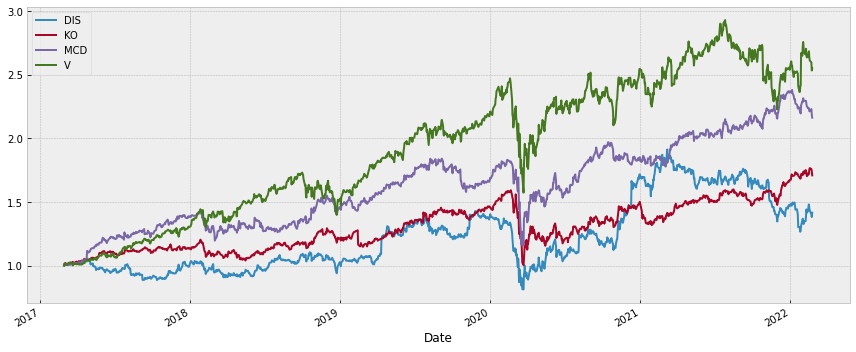

In [5]:
returns.cumsum().apply(np.exp).plot(figsize=(12,5))
plt.tight_layout()
plt.show()

In [6]:
porfolio_returns = np.dot(weights, returns.T)
porfolio_returns = pd.Series(porfolio_returns, index=returns.index)

Start date,2017-02-28
End date,2022-02-24
Total months,59
,Backtest
Annual return,11.5%
Cumulative returns,72.6%
Annual volatility,20.2%
Sharpe ratio,0.64
Calmar ratio,0.30
Stability,0.85
Max drawdown,-39.0%


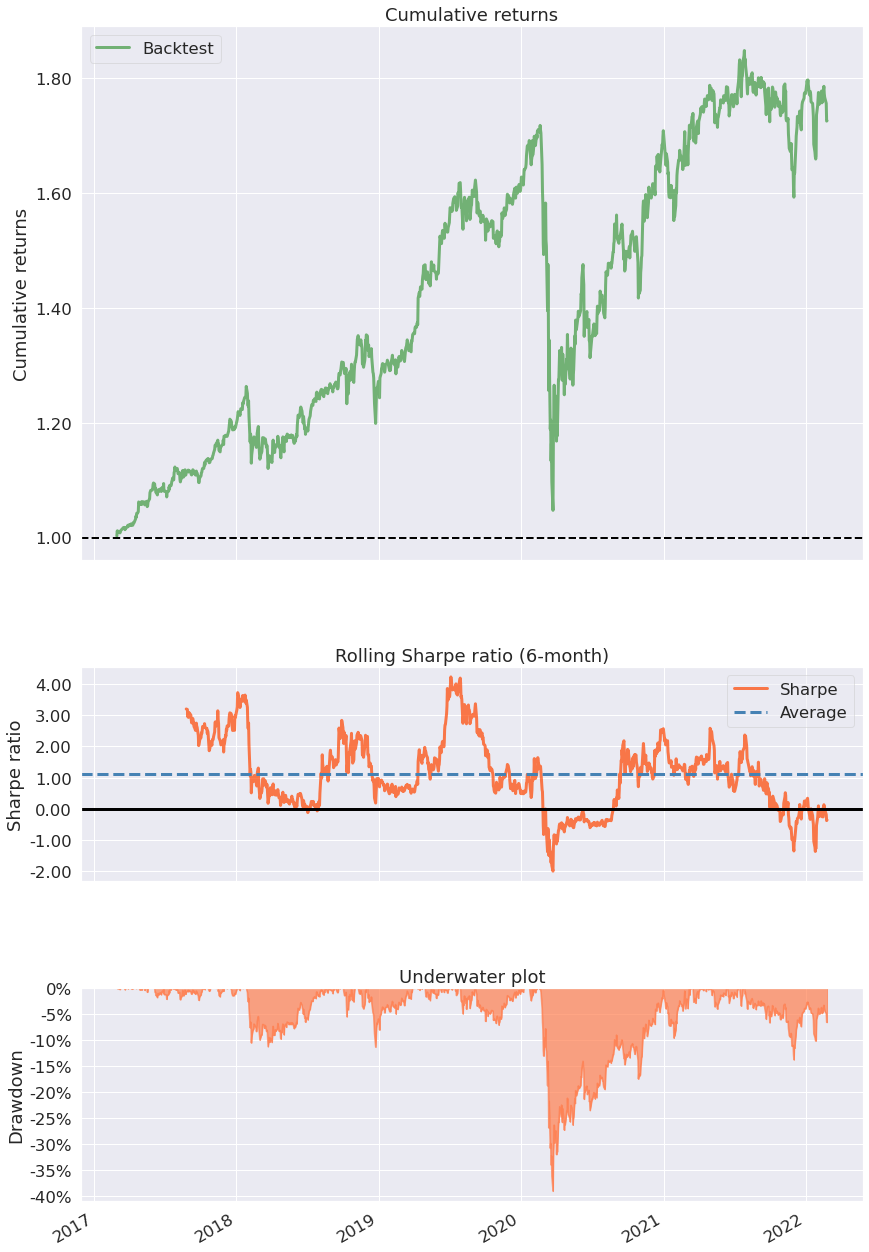

In [7]:
pf.create_simple_tear_sheet(porfolio_returns)